In [24]:
import numpy as np
import matplotlib
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

In [25]:
base = datasets.load_digits()
base

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [26]:
X = np.asarray(base.data, 'float32')

In [27]:
X.shape

(1797, 64)

In [28]:
y = base.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [29]:
normalizador = MinMaxScaler(feature_range=(0,1))

In [30]:
X = normalizador.fit_transform(X)
X[0]

array([0.        , 0.        , 0.3125    , 0.8125    , 0.5625    ,
       0.0625    , 0.        , 0.        , 0.        , 0.        ,
       0.8125    , 0.9375    , 0.625     , 0.9375    , 0.3125    ,
       0.        , 0.        , 0.1875    , 0.9375    , 0.125     ,
       0.        , 0.6875    , 0.5       , 0.        , 0.        ,
       0.26666668, 0.75      , 0.        , 0.        , 0.5       ,
       0.53333336, 0.        , 0.        , 0.35714287, 0.5       ,
       0.        , 0.        , 0.5625    , 0.5714286 , 0.        ,
       0.        , 0.25      , 0.6875    , 0.        , 0.0625    ,
       0.75      , 0.4375    , 0.        , 0.        , 0.125     ,
       0.875     , 0.3125    , 0.625     , 0.75      , 0.        ,
       0.        , 0.        , 0.        , 0.375     , 0.8125    ,
       0.625     , 0.        , 0.        , 0.        ], dtype=float32)

In [31]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
X_treinamento.shape, X_teste.shape

((1437, 64), (360, 64))

In [33]:
y_treinamento.shape, y_teste.shape

((1437,), (360,))

In [34]:
rbm = BernoulliRBM(random_state=0)
rbm.n_iter = 100
rbm.n_components = 50

In [35]:
mlp_rbm = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=300, random_state=0)

In [36]:
clf_rbm = Pipeline(steps=[('rbm', rbm), ('mlp', mlp_rbm)])
clf_rbm.fit(X_treinamento, y_treinamento)

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('rbm',
                 BernoulliRBM(n_components=50, n_iter=100, random_state=0)),
                ('mlp', MLPClassifier(max_iter=300, random_state=0))])

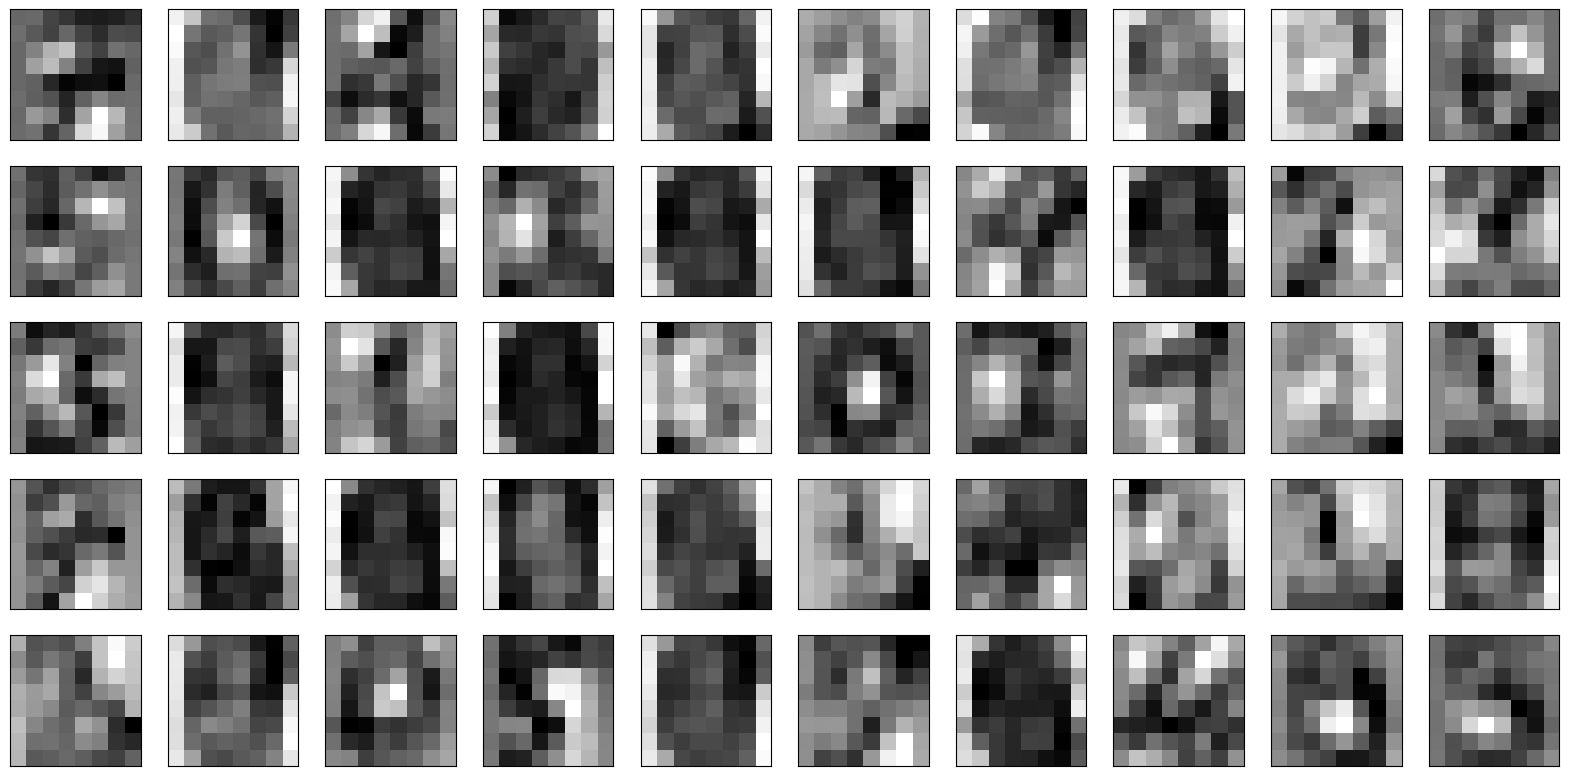

In [37]:
plt.figure(figsize=(20, 20))
for i, componente in enumerate(rbm.components_):
    plt.subplot(10, 10, i+1)
    plt.imshow(componente.reshape((8,8)), cmap=plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())


In [38]:
previsoes_rbm_mlp = clf_rbm.predict(X_teste)

In [39]:
print("Acurácia com RBM + MLPClassifier:", metrics.accuracy_score(y_teste, previsoes_rbm_mlp))

Acurácia com RBM + MLPClassifier: 0.9388888888888889


In [40]:
#sem RBM, apenas com MLPClassifier
mlp_simples = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=300, random_state=0)
mlp_simples.fit(X_treinamento, y_treinamento)

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=0)

In [41]:
previsoes_mlp = mlp_simples.predict(X_teste)

In [42]:
print("Acurácia sem RBM (somente MLPClassifier):", metrics.accuracy_score(y_teste, previsoes_mlp))

Acurácia sem RBM (somente MLPClassifier): 0.9805555555555555
